<a href="https://colab.research.google.com/github/AlexanderG40/Data-Science/blob/main/Week11_Assignment_11_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

from collections import Counter

from nltk.tokenize import word_tokenize

# Download the 'punkt' resource
import nltk
nltk.download('punkt')

# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

# Assuming 'text_data' is a pandas DataFrame column containing text
text_data = pd.read_csv('/content/sentimentdataset.csv')['Text']
text_data

# Tokenize and count words
word_counts = Counter(word_tokenize(' '.join(text_data.astype(str))))
word_counts

# # Display top N most common words
top_words = word_counts.most_common(25)
top_words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


[('the', 808),
 ('.', 784),
 ('of', 623),
 ('a', 621),
 (',', 517),
 ('in', 261),
 ('to', 133),
 ('#', 128),
 ('and', 111),
 ('with', 107),
 ('for', 99),
 ('on', 91),
 ('!', 84),
 ('by', 70),
 ("'s", 65),
 ('through', 52),
 ('an', 49),
 ('my', 41),
 ('at', 40),
 ('new', 39),
 ('each', 39),
 ('In', 39),
 ('that', 38),
 ('life', 37),
 ('as', 36)]

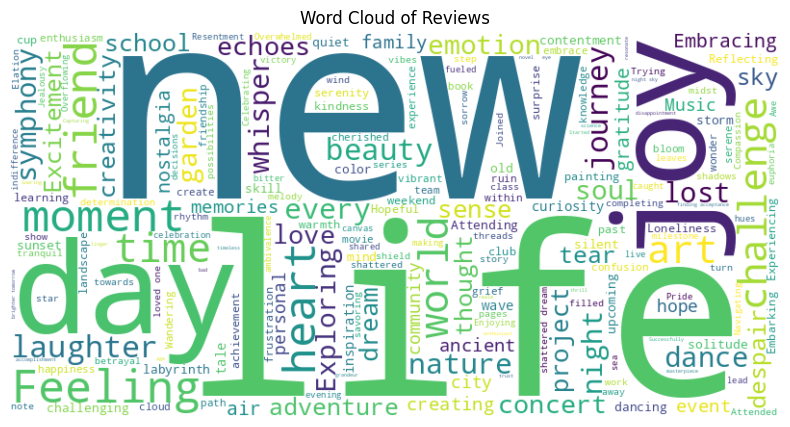

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text into a single string
text = ' '.join(text_data.astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [7]:
!pip install emoji
import emoji

def extract_emojis(text):
    return ''.join(c for c in text if c in emoji.EMOJI_DATA)

# Extract emojis from each review
text_data['emojis'] = text_data.apply(lambda x: extract_emojis(str(x)))

# Count emojis
emoji_counts = Counter(''.join(text_data['emojis']))

# Display top emojis
top_emojis = emoji_counts.most_common(10)
print("Top 10 emojis:")
for emoji, count in top_emojis:
    print(f"{emoji}: {count}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.4 MB/s eta 0:00:00
Top 10 emojis:
💪: 3
🐾: 2
❤: 2
🎉: 1
🎨: 1
🎂: 1
🐶: 1


In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    # Ensure the input is a string before analysis
    if not isinstance(text, str):
        text = str(text)
    return sia.polarity_scores(text)['compound']

# Apply sentiment analysis to each review
text_data['sentiment_score'] = text_data.apply(get_sentiment)

# Categorize sentiment
text_data['sentiment'] = text_data['sentiment_score'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

# Display sentiment distribution
print(text_data['sentiment'].value_counts(normalize=True))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Text
positive    0.633015
negative    0.257844
neutral     0.109141
Name: proportion, dtype: float64


Questions:

1. What are the most prominent words in the word cloud?  How are the prominent words significant to the product or service being reviewed? The most common words are: The with a count of (808), of with a count of (623) finally: the third is in with (261). The most common words are quite significant because it shows mostly positive words with how we can see in our last cell a 0.63 positive outlook.

2. What are the top 3 most used emojis in the reviews? Do the most common emojis align with the overall sentiment analysis results? Why or why not? The top three is the muscle flex with a total of three times. Then we see the paws and the white heart for a total of 2 times. I would say again it is very positive, a muscle flex might mean something is very strong like staying strong in tough times, the paws might mean the love for a pet and the heart I would say for love.

3. What is the overall distribution of sentiment in the reviews (positive, negative, neutral)? Are there significantly more positive or negative reviews? What might this indicate about the product or service being reviewed? There is significantly more positive then negative reviews. it is pretty much 63% postive reviews, then around 28 negative and 11 neutral. This indicates that the product/service is pretty good. Very good service or product.

4. What additional analyses or visualizations would you suggest gaining deeper insights from this review data? I would say maybe a analysis over how much a person changes his words over time. Maybe we can see the change in tone over time. Maybe we can visualize in a graph the most negative words.